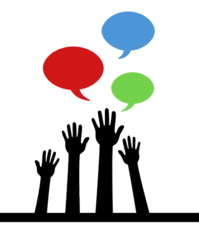

<center><font color=orange size=12px>The Sparks Foundation</font></center>

# Predicting the percentage of an student based on the no. of study hours.

## Author: Anna Sai Nikhil

### GRIPNOV20

<b> Task 1

In [53]:
#for reading and importing the data
import pandas as pd
import numpy as np

#for spliting the data into train and test data set
from sklearn.model_selection import train_test_split

#for visualizing the data
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

#for measuring how accurate the model is
from sklearn.metrics import mean_squared_error,average_precision_score,classification_report,accuracy_score,mean_absolute_error

In [54]:
#importing differnt regressors and classifiers

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.isotonic import IsotonicRegression
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model

In [55]:
#reading the data from the web

url = "http://bit.ly/w-data"
input=pd.read_csv(url)
X=np.array(input.Hours).reshape(-1, 1)
y=input.Scores

In [56]:
input

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [57]:
#Spliting the data into training and testing data sets

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [58]:
kreg=KNeighborsRegressor(n_neighbors=4).fit(X_train,y_train)
rfr=RandomForestRegressor().fit(X_train,y_train)
etr=ExtraTreesRegressor(n_estimators=50, random_state=0).fit(X_train,y_train)
lr=LinearRegression().fit(X_train,y_train)
Lr=LogisticRegression(solver='sag', max_iter=10000).fit(X_train,y_train)
reg = linear_model.BayesianRidge().fit(X_train,y_train)
iso_reg = IsotonicRegression().fit(X_train.flatten(),y_train)
regr = MLPRegressor(random_state=1, max_iter=5000).fit(X_train, y_train)

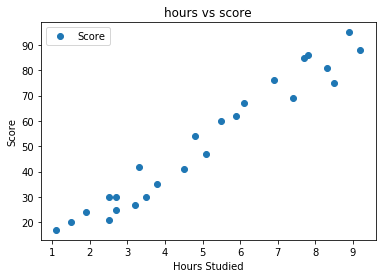

In [59]:
score_plot=plt.plot(X,y,'o')
plt.legend(['Score'],loc='upper left')
plt.title('hours vs score')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()

### The above graph shows how the no. of hours effects the marks

In [60]:
pkreg=kreg.predict(X_test)
prfr=rfr.predict(X_test)
petr=etr.predict(X_test)
plr=lr.predict(X_test)
pLr=Lr.predict(X_test)
preg=reg.predict(X_test)
piso_reg=iso_reg.predict(X_test.flatten())
pregr=regr.predict(X_test)

In [61]:
mkreg=mean_squared_error(y_test,pkreg)
mrfr=mean_squared_error(y_test,prfr)
metr=mean_squared_error(y_test,petr)
mlr=mean_squared_error(y_test,plr)
mLr=mean_squared_error(y_test,pLr)
mreg=mean_squared_error(preg,y_test)
miso_reg=mean_squared_error(y_test,piso_reg)
mregr=mean_squared_error(y_test,pregr)

In [62]:
mkreg,mrfr,metr,mlr,mLr,mreg,miso_reg,mregr

(43.975,
 80.07166944444451,
 81.40010000000002,
 21.5987693072174,
 37.4,
 21.39662246610117,
 45.80445842978396,
 19.607397564992176)

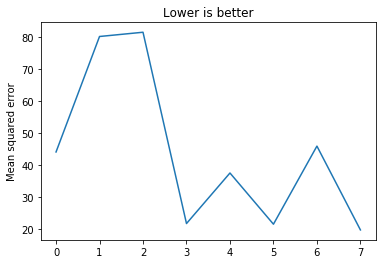

In [63]:
import matplotlib.pyplot as plt
plt.plot([mkreg,mrfr,metr,mlr,mLr,mreg,miso_reg,mregr])
plt.ylabel('Mean squared error')
plt.title('Lower is better')
plt.show()

#### The above graph show differnt models and their mean squared errors

In [64]:
mkreg=mean_absolute_error(y_test,pkreg)
mrfr=mean_absolute_error(y_test,prfr)
metr=mean_absolute_error(y_test,petr)
mlr=mean_absolute_error(y_test,plr)
mLr=mean_absolute_error(y_test,pLr)
mreg=mean_absolute_error(preg,y_test)
miso_reg=mean_absolute_error(piso_reg,y_test)
mregr=mean_absolute_error(pregr,y_test)

In [65]:
mkreg,mrfr,metr,mlr,mLr,mreg,miso_reg,mregr

(5.0,
 7.183000000000004,
 7.734,
 4.183859899002975,
 4.6,
 4.152308533771257,
 5.6631944444444455,
 3.756281719595944)

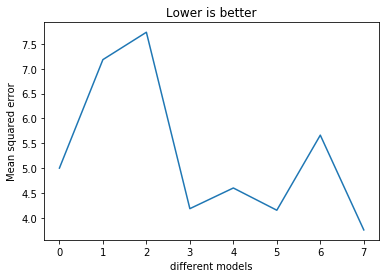

In [66]:
import matplotlib.pyplot as plt
plt.plot([mkreg,mrfr,metr,mlr,mLr,mreg,miso_reg,mregr])
plt.xlabel('different models')
plt.ylabel('Mean squared error')
plt.title('Lower is better')
plt.show()

In [67]:
#predicting values with our model

pregr=regr.predict(X)

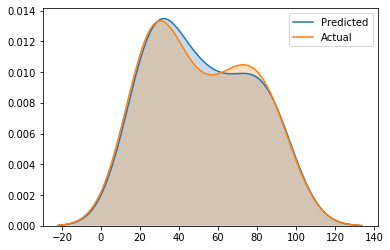

In [68]:
sns.kdeplot(pregr,label="Predicted", shade=True);

sns.kdeplot(y, label="Actual", shade=True);

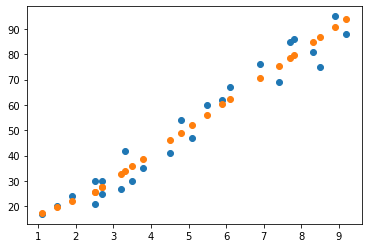

In [69]:
plt.plot(X,y,'o')
plt.plot(X,pregr,'o')

# <font color=brown> From the above models MLPRegressor is the best model</font>

### Using MLPRegressor For prediction of marks of a student who studies 9.25 hrs a day

In [70]:
pregr=regr.predict([[9.25]])

In [71]:
pregr

array([94.33376228])

## Conclusion

#### The student who studies 9.25 hrs a day gets 94.3 marks